# OrionKL test with method 1

In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
from IPython.display import display

import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 20})

#from pycupid import *

save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-3rd_mnras_submission/figures/"

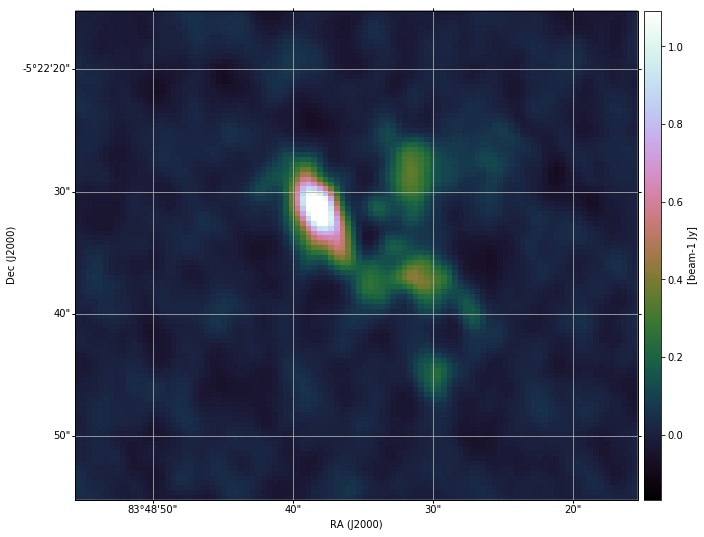

In [2]:
fits_path = '../data/images/Orion.cont.image.fits'
#fits_path = '../data/images/OphA_ExtnCambR_F.fits'
#fits_path = '../data/images/PerA_Extn2MASS_F_Gal.fits'
#fits_path = '../data/images/RhoOphiuchus60.fits'
#fits_path = '../data/images/perseus60.fits'
#fits_path = '../data/SCIMES/orion_12CO_mom0.fits'

data,wcs,hdu,spec = load_data(fits_path)
base_level = estimate_rms(data)
image_plot(data, wcs=wcs, unit=hdu.header["BUNIT"])

In [3]:
preprocessing(data, wcs)

interactive(children=(FloatSlider(value=0.10237737624469602, description='back_level', max=0.20475475248939204…

In [4]:
print(numba.__version__)

0.39.0


[INFO] Number of pixels with significant emission: 749
[INFO] Level of compression: 26.702269692923895%
[INFO] Number of ICEs: 3
Isolated Cloud Entity A: 47 pixels of significant emission.
Isolated Cloud Entity B: 508 pixels of significant emission.
Isolated Cloud Entity C: 194 pixels of significant emission.


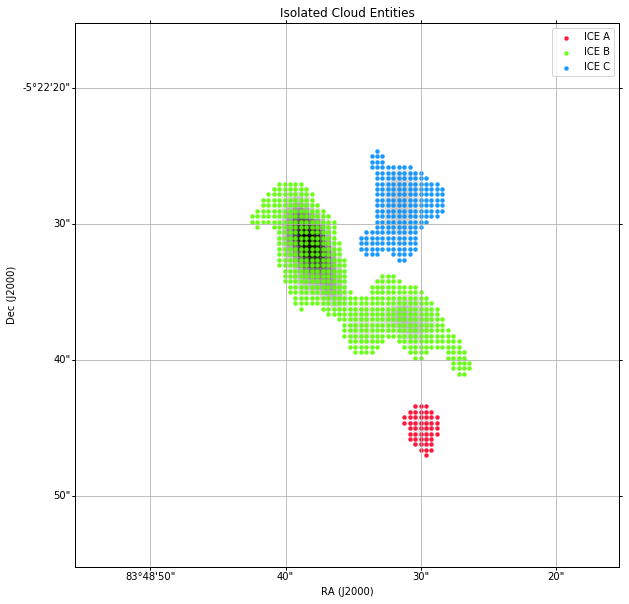

####################################################################################################


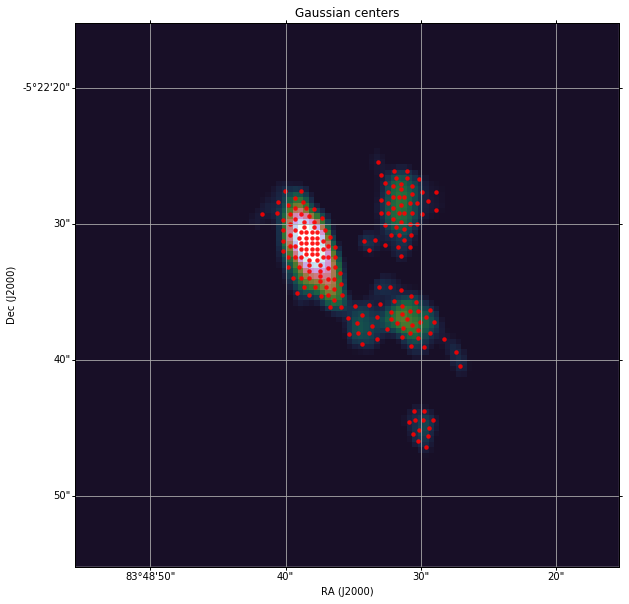

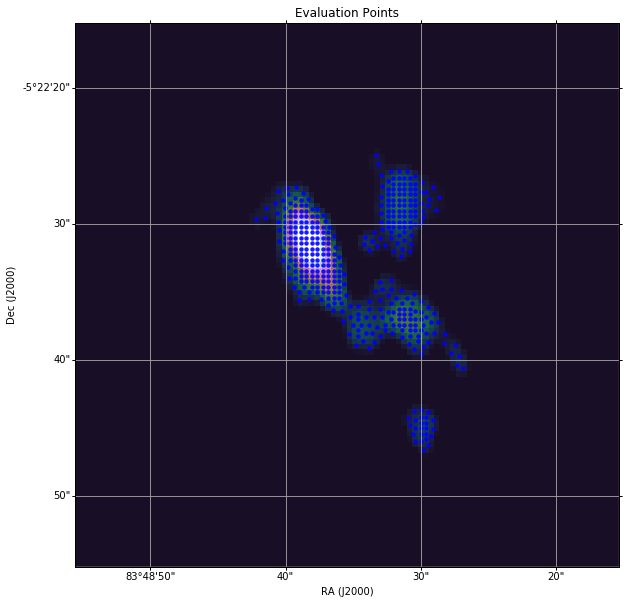

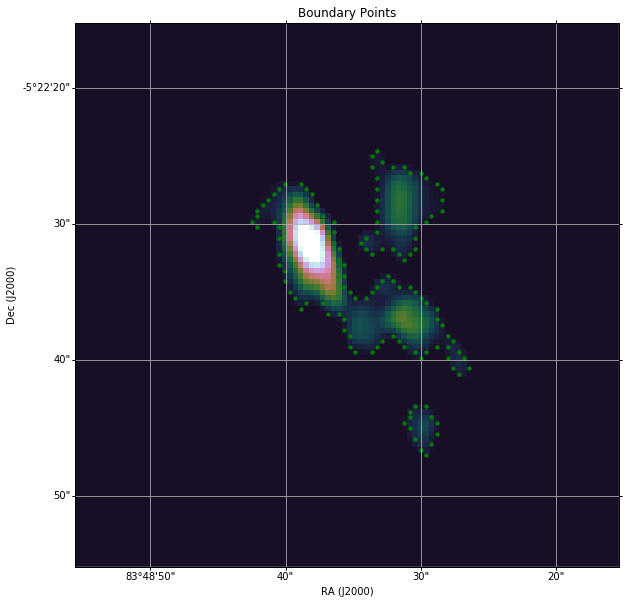

 
*** Profile printout saved to text file 'gmr_v1.prof'. 


In [5]:
%%prun -s tottime -q -l 30 -T gmr_v1.prof
hdmc = HDMClouds(data, back_level=0.089, wcs=wcs, verbose=True, n_gaussians=200)

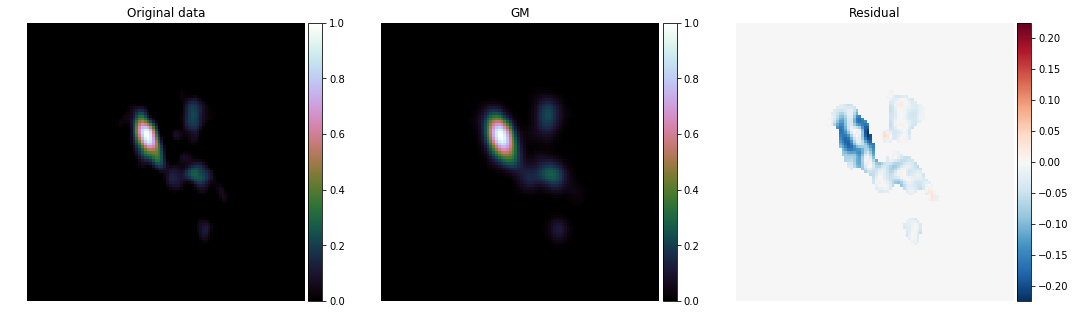

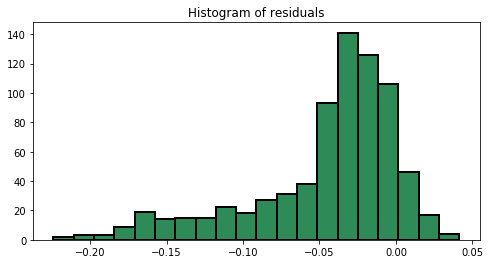

RESIDUAL STATS
RMS of residual: 0.018090399761626214
Inf norm of residual: 0.22393295351366754
Variance of residual: 0.0003157537164378239
Normalized flux addition: 0.3101337084554279
Normalized flux lost: 0.006898184234022668


In [5]:
hdmc.get_residual_stats();

In [7]:
print(open('gmr_v1.prof', 'r').read())

         3213514 function calls (3164642 primitive calls) in 64.611 seconds

   Ordered by: internal time
   List reduced from 3674 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    22506   58.856    0.003   58.856    0.003 {method 'acquire' of '_thread.lock' objects}
     2844    0.404    0.000    0.405    0.000 ffi.py:105(__call__)
     4004    0.334    0.000    0.334    0.000 {built-in method _thread.start_new_thread}
       13    0.277    0.021    2.057    0.158 utils.py:186(compute_neighbors)
      551    0.254    0.000    0.254    0.000 gmr.py:289(update_structs_nn)
        8    0.228    0.029    0.228    0.029 {built-in method matplotlib._png.write_png}
    20626    0.185    0.000    0.186    0.000 {built-in method numpy.core.multiarray.array}
     1482    0.180    0.000    0.182    0.000 core.py:76(function)
  1621216    0.133    0.000    0.133    0.000 {method 'append' of 'list' objects}
    41335    0.111    0.000    0.

In [7]:
m = 500
w = np.random.random(m)
mu = np.random.random((m,2))
cov = np.random.random(m)

In [9]:
%%prun -s tottime -q -l 30 -T test.prof
mixture_reduction(w, mu, cov, n_comp=100, verbose=False)

 
*** Profile printout saved to text file 'test.prof'. 


In [10]:
print(open('test.prof', 'r').read())

         326465 function calls (326464 primitive calls) in 42.465 seconds

   Ordered by: internal time
   List reduced from 265 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    15646   41.310    0.003   41.310    0.003 {method 'acquire' of '_thread.lock' objects}
     2807    0.146    0.000    0.146    0.000 {built-in method _thread.start_new_thread}
      400    0.051    0.000    0.051    0.000 gmr.py:288(update_structs_nn)
      400    0.044    0.000   42.163    0.105 gmr.py:265(radius_search)
     6820    0.041    0.000    0.041    0.000 threading.py:215(__init__)
        1    0.037    0.037   42.465   42.465 gmr.py:349(mixture_reduction)
      800    0.030    0.000    0.030    0.000 {method 'argsort' of 'numpy.ndarray' objects}
     2807    0.028    0.000    0.075    0.000 threading.py:757(__init__)
     3209    0.022    0.000    0.437    0.000 threading.py:263(wait)
     2807    0.021    0.000    0.434    0.000 threading.p

***
***

In [ ]:
%%prun -s tottime -q -l 30 -T hdmc_m1.prof
hdmc.build_gmr()

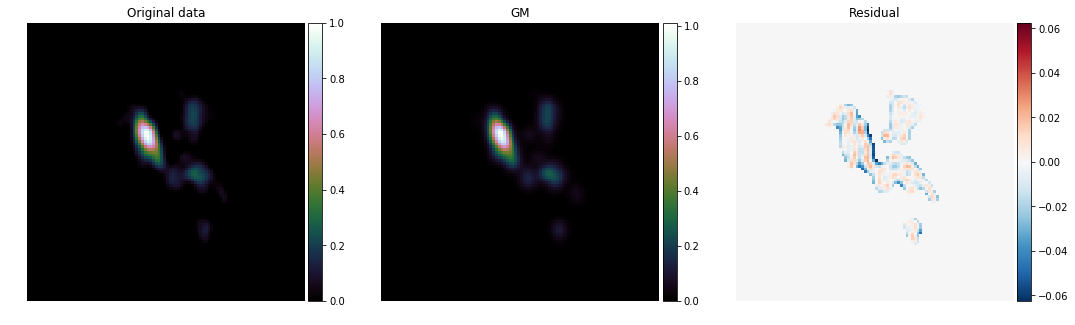

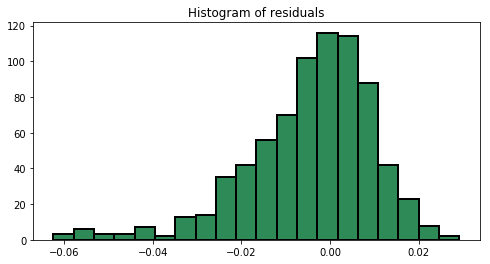

RESIDUAL STATS
RMS of residual: 0.004085373845117105
Inf norm of residual: 0.06244140040785702
Variance of residual: 1.658003798875724e-05
Normalized flux addition: 0.05098685483304326
Normalized flux lost: 0.02130871635880038


In [7]:
hdmc.get_residual_stats();

In [8]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 105.55945181846619


In [9]:
w,sig = hdmc.get_params()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.23173941625336164
sig variation:  0.060906467261056904


#### Profiling results

In [10]:
print(open('hdmc_m1.prof', 'r').read())

         480276 function calls in 105.560 seconds

   Ordered by: internal time
   List reduced from 72 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   159695   84.911    0.001   84.911    0.001 {fgm_eval.gm_eval2d_2}
        3    9.893    3.298  105.545   35.182 {built-in method scipy.optimize._minpack._lmdif}
    79846    5.955    0.000   95.657    0.001 hdmclouds_v1.py:919(F)
    79852    3.586    0.000    3.586    0.000 utils.py:150(sig_mapping)
    79851    1.150    0.000    1.150    0.000 {built-in method numpy.core.multiarray.concatenate}
    79861    0.058    0.000    0.058    0.000 {built-in method builtins.len}
       64    0.002    0.000    0.002    0.000 socket.py:334(send)
       60    0.000    0.000    0.004    0.000 iostream.py:382(write)
       64    0.000    0.000    0.003    0.000 iostream.py:195(schedule)
       21    0.000    0.000    0.000    0.000 {method 'reduce' of 'numpy.ufunc' objects}
        3    0.00

***

### Building the hierarchical tree

In [11]:
hdmc.build_hierarchical_tree()

Building the hierarchical tree for Isolated Cloud Entity A
DONE

Building the hierarchical tree for Isolated Cloud Entity B
DONE

Building the hierarchical tree for Isolated Cloud Entity C
DONE



In [12]:
hdmc.visualize()

interactive(children=(Text(value='', description='split'), Text(value='', description='join1'), Text(value='',…

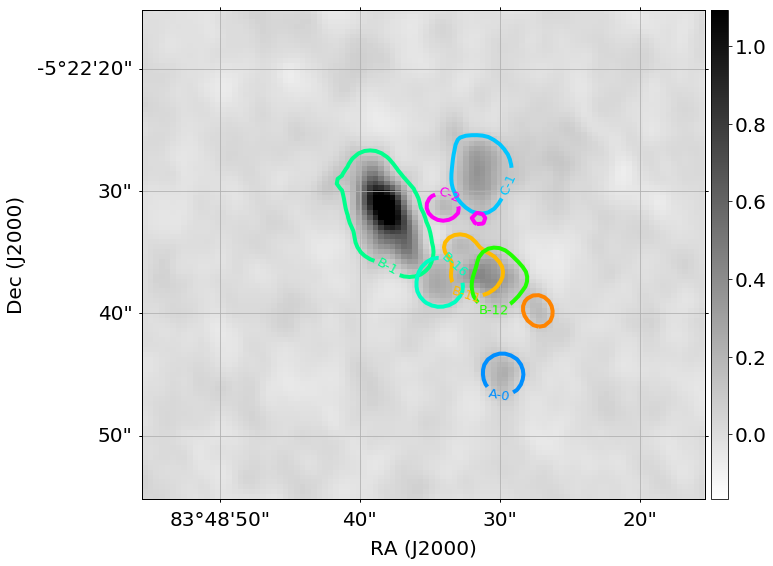

In [15]:
gp.ce_plot(hdmc, wcs=hdmc.wcs)

In [16]:
hdmc.compute_stats()

,Flux [Jy/Beam],Centroid Position (X-Y),Centroid Position (RA-Dec)
A-0,2.147527,"(0.6368638875248441, 0.25473560360098946)","(83deg48m29.9521s, -5deg22m45.0106s)"
B-1,84.951043,"(0.43368760560635133, 0.5852186109565544)","(83deg48m38.1151s, -5deg22m31.7913s)"
B-11,4.850516,"(0.5962094039572834, 0.46360942538589645)","(83deg48m31.5855s, -5deg22m36.6556s)"
B-12,4.485838,"(0.6259620035282641, 0.44745632573727134)","(83deg48m30.3901s, -5deg22m37.3017s)"
B-16,1.619824,"(0.5301087679733858, 0.4444386448982937)","(83deg48m34.2412s, -5deg22m37.4225s)"
B-26,-0.736712,"(0.6992121474460667, 0.38888118813834427)","(83deg48m27.4472s, -5deg22m39.6447s)"
C-1,13.424899,"(0.5996889860816439, 0.6665311706140267)","(83deg48m31.4457s, -5deg22m28.5387s)"
C-2,0.257372,"(0.5643447767479972, 0.5978298951908819)","(83deg48m32.8657s, -5deg22m31.2868s)"


***

## Comparison with `clumpfind` and `fellwalker`

In [124]:
from pycupid import clumpfind,fellwalker


def compute_caa_stats(data, caa, wcs):
    stats = {}

    for i in range(caa.min()+1, caa.max()+1):
        values = data[caa==i]
        xpos,ypos = np.where(caa==i)

        flux = np.sum(values)
        x_centroid = np.sum(xpos*values)/np.sum(values)
        y_centroid = np.sum(ypos*values)/np.sum(values)

        wx_centroid,wy_centroid = wcs.wcs_pix2world(x_centroid,y_centroid,0)

        stats["CE {0}".format(i)] = (flux, (x_centroid,y_centroid), (wx_centroid,wy_centroid))


    stats = pd.DataFrame.from_dict(stats, orient="index", columns=["Flux [Jy/Beam]", "Centroid Position [pix]", "Centroid Position (ra-dec) [deg]"])   

    display(stats)
    return stats


def caa_show(data, caa, save_path=None, wcs=None):
    bd_map = boundary_map_caa(caa).T
    colors = plt.cm.rainbow(np.linspace(0., 1., caa.max()))
    
    cmap = plt.cm.gray_r
    norm = plt.Normalize(data.min(), data.max())
    rgba = cmap(norm(data))
    
    m,n = data.shape
    for i in range(m):
        for j in range(n):
            if bd_map[i,j]==0: continue
            rgba[i,j,:] = colors[bd_map[i,j]-1]

    patches = []
    for i,color in enumerate(colors):
        colors[bd_map[i,j]-1]
        patches.append(mpatches.Patch(color=color, label='CE {0}'.format(i+1)))

    fig = plt.figure(figsize=(8,8))
    if wcs is not None: fig.gca(projection=wcs)
    im = plt.imshow(rgba)
    plt.grid()
    if wcs is not None:
        plt.xlabel(umap[wcs.axis_type_names[0]])
        plt.ylabel(umap[wcs.axis_type_names[1]])
    else:
        plt.tick_params(labelbottom=False, labelleft=False)
    ax = plt.gca()
    ax.invert_yaxis()
    if save_path is not None:
        plt.savefig(save_path, format='eps', dpi=150, bbox_inches='tight')
    #if wcs is not None:
        #cbar = plt.colorbar(im, ax=ax, pad=0.01, aspect=30)
    ax.set_aspect('auto')
    plt.legend(handles=patches)
    plt.show()

***
### `clumpfind`

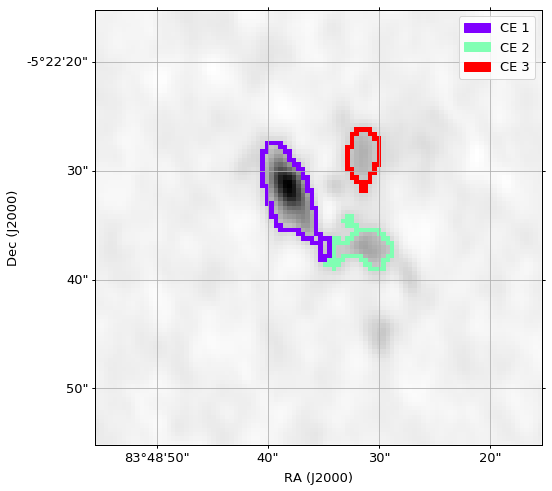

In [125]:
#out_cf = clumpfind(data, 0.5*base_level)
out_cf = clumpfind(data, 0.078)
out_cf[out_cf==out_cf.min()] = 0.

caa_show(data, out_cf, wcs=wcs)

In [126]:
compute_caa_stats(data, out_cf, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,47.263725,"(45.102418348646694, 55.110800500659856)","(83.81033824649124, -5.375821021923468)"
CE 2,63.512123,"(58.75269896603537, 43.558794516594915)","(83.80881484605455, -5.377104577610403)"
CE 3,5.147349,"(60.02130581784532, 62.89499710792854)","(83.80867327066305, -5.374956110414155)"


***
### `Fellwalker`

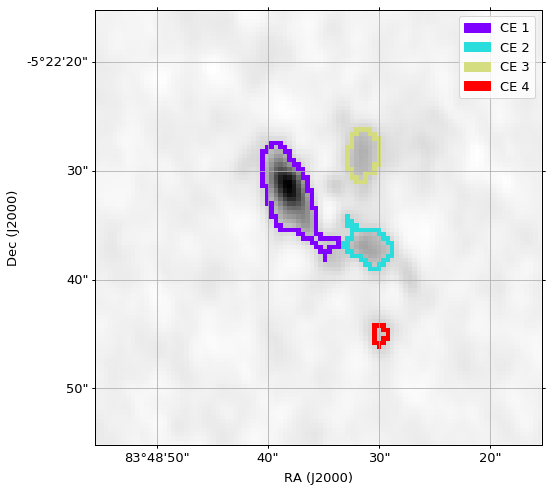

In [121]:
#out_fw = fellwalker(data, 0.5*base_level)
out_fw = fellwalker(data, 0.078)
out_fw[out_fw==out_fw.min()] = 0.

caa_show(data, out_fw, wcs=wcs)

In [122]:
compute_caa_stats(data, out_fw, wcs);

,Flux [Jy/Beam],Centroid Position [pix],Centroid Position (ra-dec) [deg]
CE 1,50.195412,"(45.665768954545506, 54.56304219068273)","(83.81027537549518, -5.375881884010656)"
CE 2,49.184555,"(60.03908211413193, 43.62341974234582)","(83.80867128285561, -5.3770973967846585)"
CE 3,4.008535,"(59.995116623768396, 63.916111878214366)","(83.80867619363268, -5.374842653222719)"
CE 4,-0.134510,"(64.38228471820102, 23.446268155351156)","(83.80818656590594, -5.379339301442377)"


***